In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200

In [ ]:
# worksheet = gc.open('CIFAR10_NoiseResiliency-Results').sheet1
#### or
# worksheet = result_sheets.worksheets()[0] # take the second sheet

# rows = worksheet.get_all_values()
# pd.DataFrame.from_records(rows)

In [ ]:
result_sheets = gc.open('CIFAR10_Noisy_20211006')

In [ ]:
flag=True
modelnames=[]
for w in result_sheets.worksheets():
  model_name = str(w).split(' ')[1][1:-1]
  modelnames.append(model_name)
  print(model_name)
  rows = w.get_all_values()
  if rows == []:
    continue
  hdr=rows[0]
  hdr = [f'{model_name}{h[2:]}' for h in hdr]
  hdr[0] = 'noise'
  if flag==True:
    df = pd.DataFrame(rows[1:], columns = hdr)
    flag=False
  else:
    new_df = pd.DataFrame(rows[1:], columns = hdr)
    df = pd.merge(df, new_df, how='left')

MoCo_512_sym
MoCo_512_asym
SimCLR_512_sym
SimCLR_512_asym
SwAV_512_sym
SwAV_512_asym
BYOL_512_sym
BYOL_512_asym
SimSiam_512_sym
SimSiam_512_asym


In [ ]:
df

,noise,MoCo_512_sym,MoCo_512_asym,SimCLR_512_sym,SimCLR_512_asym,SwAV_512_sym,SwAV_512_asym,BYOL_512_sym,BYOL_512_asym,SimSiam_512_sym,SimSiam_512_asym
0,0,83.57,83.57,81.92,81.92,66.71,66.71,67.29,67.29,80.46,80.46
1,0.1,82.148,83.43,81.24,81.84,65.11,66.52,65.67,66.98,79.53,80.34
2,0.2,80.55,82.95,80.37,81.62,63.57,66.13,64.56,66.70,78.32,80.07
3,0.3,78.616,81.90,79.13,81.15,61.36,64.76,62.65,65.67,76.50,79.27
4,0.4,75.816,80.05,77.05,80.06,60.07,63.36,61.11,64.14,73.90,78.15
5,0.5,73.258,76.77,75.24,77.96,57.82,61.37,59.15,62.29,72.28,74.82
6,0.6,70.239,73.12,71.56,73.91,55.25,59.11,57.00,59.20,68.49,72.13
7,0.7,67.28,69.50,70.06,70.24,54.33,55.40,55.12,56.28,65.12,67.44
8,0.8,62.648,62.87,65.71,65.05,51.16,51.97,52.89,51.74,62.42,62.26
9,0.9,57.624,56.38,60.38,57.40,47.41,46.82,47.79,47.09,57.45,55.51


In [ ]:
def legend_without_duplicate_labels(ax):
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique))


In [ ]:
def plot_it(noise, acc, name, c, noise_range=(0,10), diff=True, line_style='-'):
    i,j = noise_range
    ref=acc[0] if diff else 0
    plt.plot(noise[i:j], (acc-ref)[i:j], color=c, label=name, linestyle=line_style)
    noise_ths = [0]
    noise_ths.extend([f'{i}0' for i in range(10) if i!=0])
    plt.xticks(noise[i:j], noise_ths)
    plt.xlabel('symmetric label noise (%)')
    plt.ylabel('test accuracy degradation')
    plt.legend(loc=3)

MoCo
SimCLR
SwAV
BYOL
SimSiam


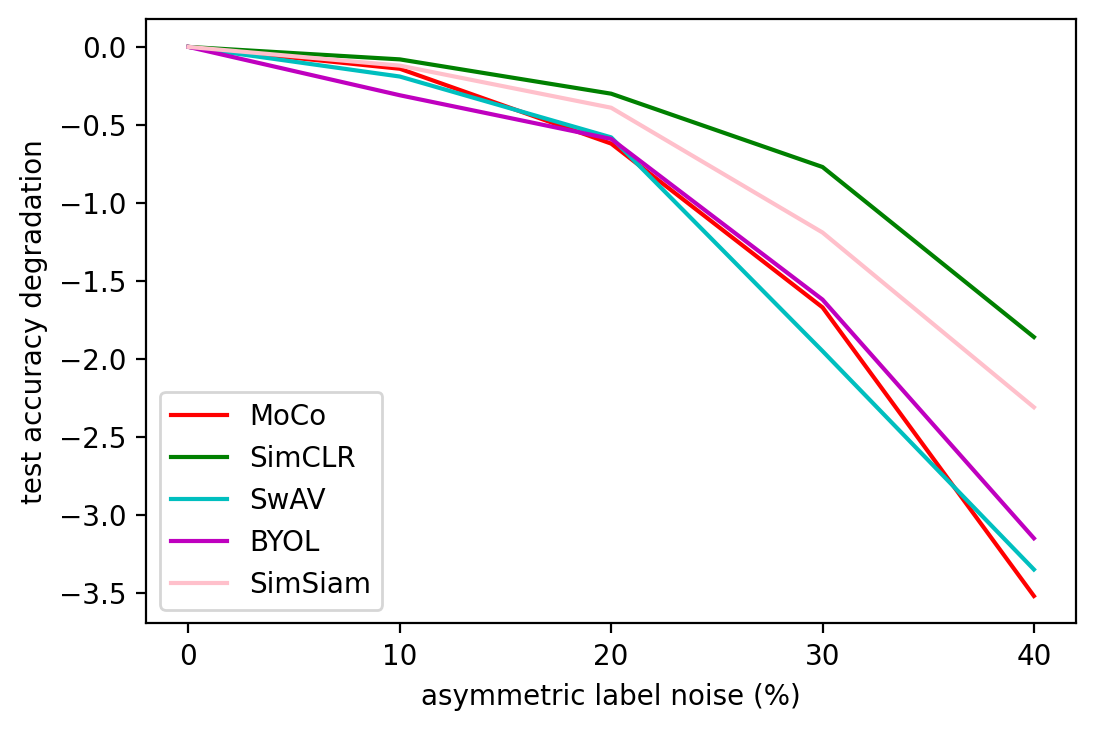

In [ ]:
ii=5
noise = list(df.noise.astype(float))
colors=['r','r', 'g', 'g', 'c', 'c', 'm', 'm', 'pink','pink', 'lime', 'lime']
for m,c in zip(modelnames,colors):
    name=m.split('_')[0]#+'-'+ m.split('_')[2]
    # name=f'{m}'
    acc = np.array(df[m].apply(pd.to_numeric))
    if '_asym' in m:
      # continue
      print(name)

      plot_it(noise, acc, name, c=c, noise_range=(0,ii), diff=True, line_style='-')

    if '_sym' in m:
      continue
      print(name)
      plot_it(noise, acc, name, c=c, noise_range=(0,ii), diff=True, line_style='--')
      

In [ ]:
def plot_it(noise, acc, name, c, noise_range=(0,10), diff=True, line_style='-'):
    i,j = noise_range
    ref=acc[0] if diff else 0
    plt.plot(noise[i:j], (acc-ref)[i:j], color=c, label=name, linestyle=line_style)
    noise_ths = [0]
    noise_ths.extend([f'{i}0' for i in range(10) if i!=0])
    plt.xticks(noise[i:j], noise_ths)
    plt.xlabel('asymmetric label noise (%)')
    plt.ylabel('test accuracy degradation')
    plt.legend(loc=3)

MoCo
SimCLR
SwAV
BYOL
SimSiam


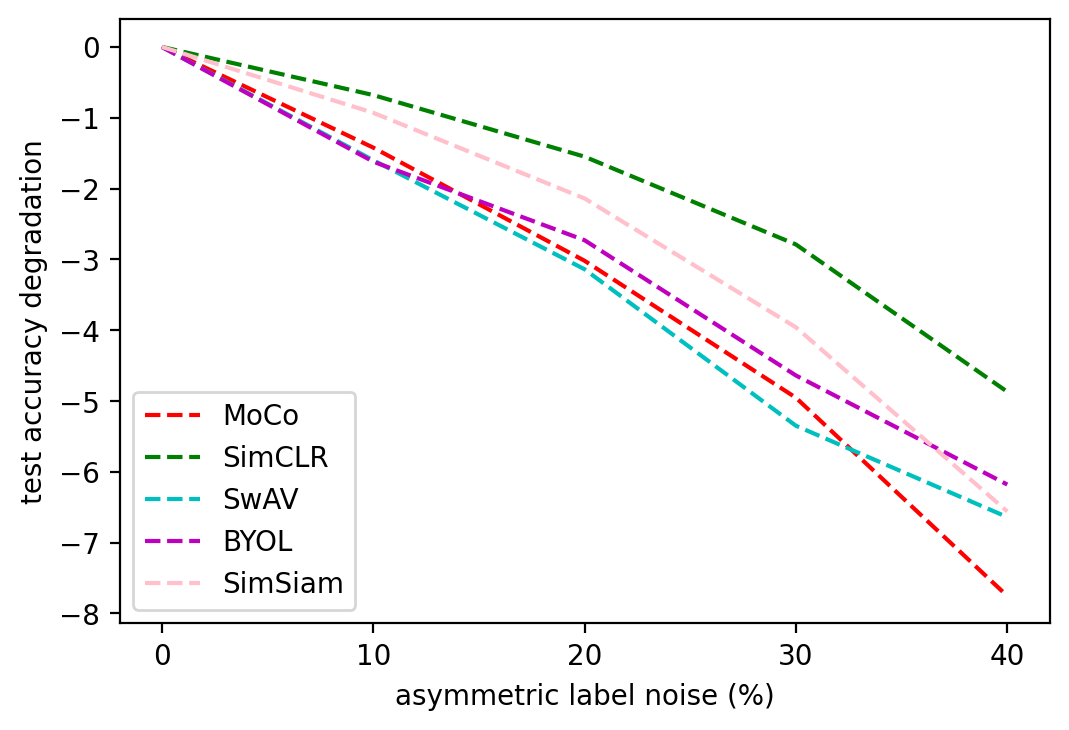

In [ ]:
noise = list(df.noise.astype(float))
colors=['r','r', 'g', 'g', 'c', 'c', 'm', 'm', 'pink','pink', 'lime', 'lime']
for m,c in zip(modelnames,colors):
    name=m.split('_')[0]#+'-'+ m.split('_')[2]
    # name=f'{m}'
    acc = np.array(df[m].apply(pd.to_numeric))
    if 'asym' in m:
      continue
      print(name)

      plot_it(noise, acc, name, c=c, noise_range=(0,ii), diff=True, line_style='-')

    if 'sym' in m:
      # continue
      print(name)
      plot_it(noise, acc, name, c=c, noise_range=(0,ii), diff=True, line_style='--')

In [ ]:
def plot_it(noise, acc, name, c, noise_range=(0,10), diff=True, line_style='-'):
    i,j = noise_range
    ref=acc[0] if diff else 0
    plt.plot(noise[i:j], (acc-ref)[i:j], color=c, label=name, linestyle=line_style)
    noise_ths = [0]
    noise_ths.extend([f'{i}0' for i in range(10) if i!=0])
    plt.xticks(noise[i:j], noise_ths)
    plt.xlabel('label noise (%)')
    plt.ylabel('test accuracy')
    plt.legend()

MoCo-sym
MoCo-asym
MoCo-asym
SimCLR-sym
SimCLR-asym
SimCLR-asym
SwAV-sym
SwAV-asym
SwAV-asym
BYOL-sym
BYOL-asym
BYOL-asym
SimSiam-sym
SimSiam-asym
SimSiam-asym


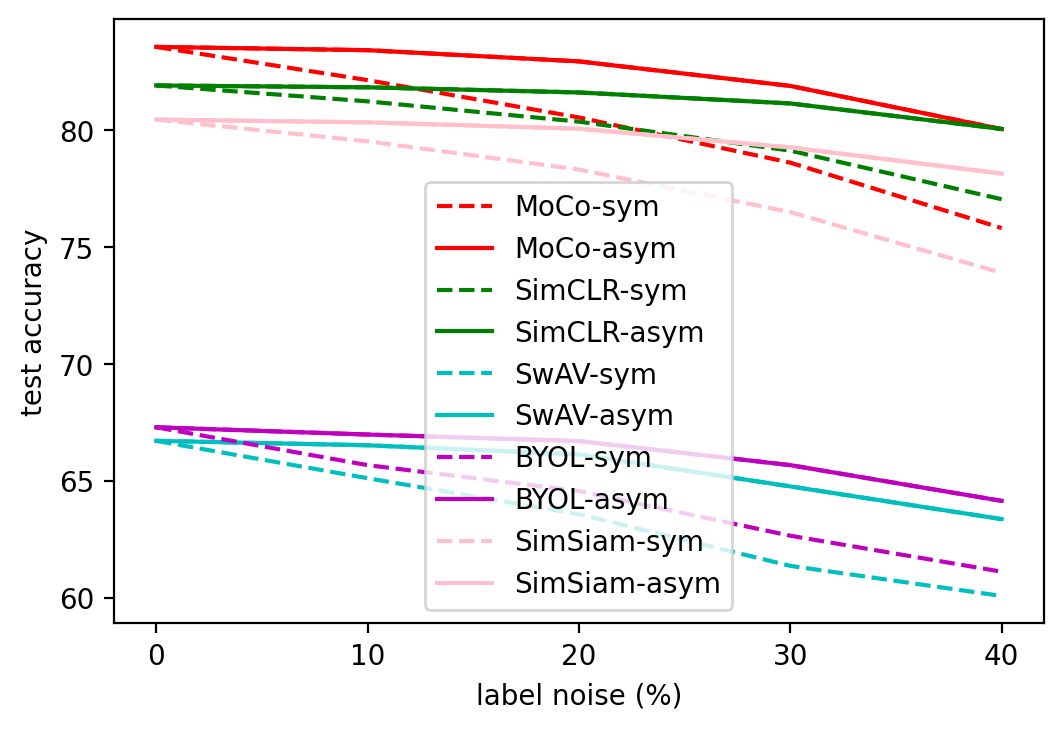

In [ ]:
fig, ax = plt.subplots()

noise = list(df.noise.astype(float))
colors=['r','r', 'g', 'g', 'c', 'c', 'm', 'm', 'pink','pink', 'lime', 'lime']
for m,c in zip(modelnames,colors):
    name=m.split('_')[0]+'-'+ m.split('_')[2]
    # name=f'{m}'
    acc = np.array(df[m].apply(pd.to_numeric))
    if 'asym' in m:
      # continue
      print(name)

      plot_it(noise, acc, name, c=c, noise_range=(0,ii), diff=False, line_style='-')

    if 'sym' in m:
      # continue
      print(name)
      plot_it(noise, acc, name, c=c, noise_range=(0,ii), diff=False, line_style='--')

legend_without_duplicate_labels(ax)

In [ ]:
observation simclr and moco both use + and - but SimClr is more robust. why?
# tsne moco vs simclr at noise level 0.4
# poterntial reasons for why MoCo and SimCLR are different:
- outdated features
- the way the memory bank keeps samples (is it just FIFO? or another more selective method is implemented by lightly?)

SyntaxError: ignored

In [ ]:
plots sepatrate sym and asym


note that we only used a single seed 



In [ ]:
acc_asym=[]
acc_sym=[]
for cc in list(df.columns)[1:]:
  if '_asym' in cc:
    acc_asym.append(list(df[cc]))
  else:
    acc_sym.append(list(df[cc]))

In [ ]:
acc_sym=np.array(acc_sym).astype(float)
acc_asym=np.array(acc_asym).astype(float)

In [ ]:
temp = np.array([arr-arr[0] for arr in acc_sym])
var_sym = np.var(temp,axis=0)

temp = np.array([arr-arr[0] for arr in acc_asym])
var_asym = np.var(temp,axis=0)

In [ ]:
noise_ths=[f'0.{i}' for i in range(10)]


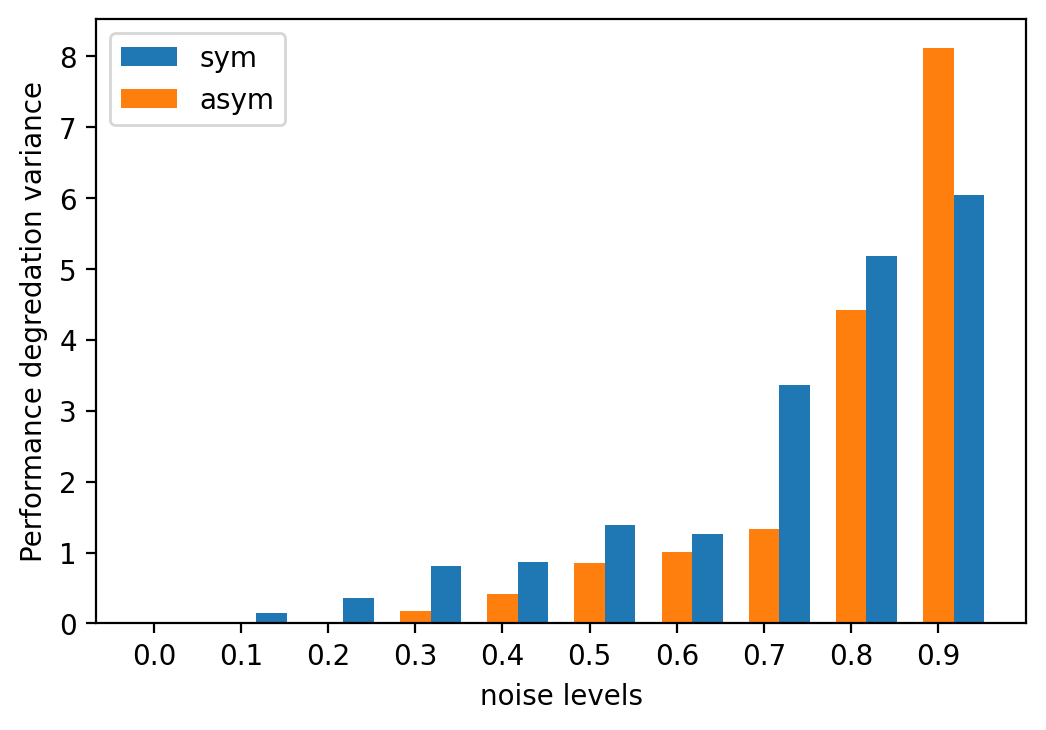

In [ ]:
import matplotlib.pyplot as plt
# from matplotlib.dates import date2num
import datetime

x=np.arange(10)

y = var_asym
z = var_sym

ax = plt.subplot(111)

width = 0.35       

plt.bar(x + width, z, width, label='sym')
plt.bar(x        , y, width, label='asym')

plt.xticks(x, noise_ths)
plt.xlabel('noise levels')
plt.ylabel('Performance degredation variance')
ax.legend()
plt.show()

In [ ]:
temp = np.array([arr-arr[0] for arr in acc_sym])
var_sym = np.mean(temp,axis=0)

temp = np.array([arr-arr[0] for arr in acc_asym])
var_asym = np.mean(temp,axis=0)

In [ ]:
plt.close('all')

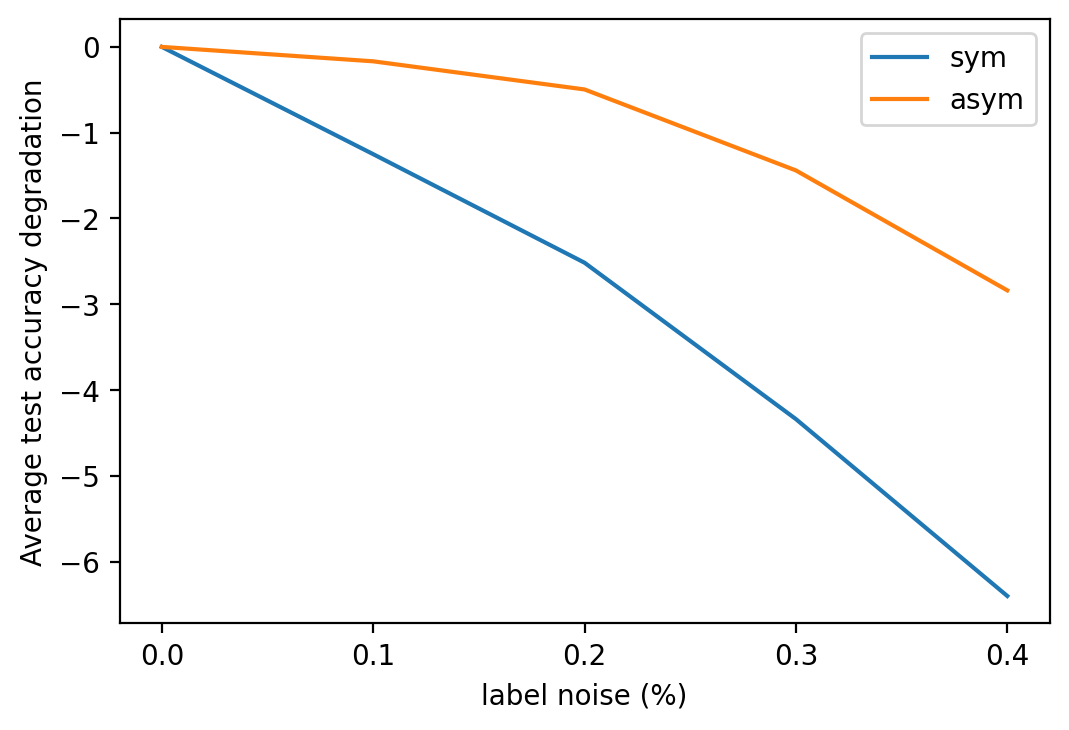

In [ ]:
import matplotlib.pyplot as plt
import datetime

x=np.arange(10)

y = var_asym
z = var_sym

ax = plt.subplot(111)

plt.plot(x[:ii], z[:ii], label='sym')
plt.plot(x[:ii], y[:ii], label='asym')

plt.xticks(x[:ii], noise_ths[:ii])
plt.xlabel('label noise (%)')
plt.ylabel('Average test accuracy degradation')
ax.legend()
plt.show()